In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Taxi_Trips_-_2024_20240408.csv")
df.head()


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [4]:

df = df[['Trip Miles','Fare','Tips', 'Trip Total']]
df.head()

,Trip Miles,Fare,Tips,Trip Total
0,0.09,3.25,0.00,38.75
1,3.00,12.00,0.00,12.00
2,5.84,16.75,4.45,26.70
3,13.36,34.75,7.85,47.10
4,6.13,18.51,4.31,22.82


In [5]:
df.shape

(865247, 4)

In [6]:
df.isnull().sum() 

Trip Miles       6
Fare          2045
Tips          2045
Trip Total    2045
dtype: int64

In [7]:
df = df.dropna()

In [9]:
X = df[['Trip Miles', 'Tips', 'Fare']]
y = df['Trip Total']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Text(0.5, 1.0, 'Actual vs Predicted Taxi Fare')

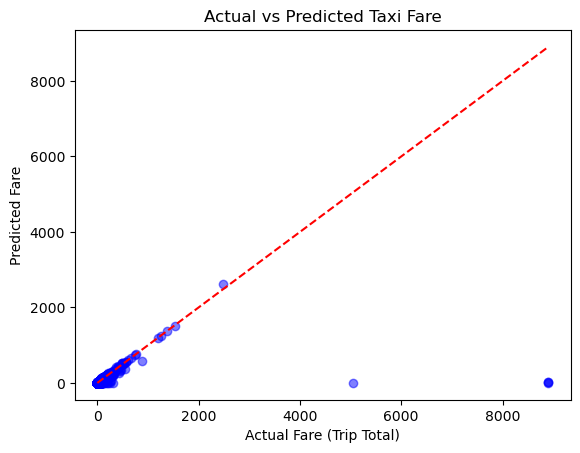

In [10]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Fare (Trip Total)")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")

In [11]:
model.predict([[4,24,8]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.74615316])

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(y_pred[:5])        
print(y_test[:5].values)

[33.00470315 28.6382452   9.54344934  3.70771275 42.59184596]
[31.25 24.98  8.75  3.5  41.5 ]


In [16]:
dw= pd.read_csv(r'C:\Users\USER\Downloads\Weight_Height_Age_Gender.csv')
dw.head()   

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [17]:

dw.shape

(10, 4)

In [18]:
X = dw[['Height','Age']]     
y = dw['Weight']

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              
    test_size=0.2,   
    random_state=42
)

In [20]:
print("Size of training data: ",len(X_train), "\nSize of test split: ",len(X_test))

Size of training data:  8 
Size of test split:  2


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.predict([[1.6,20]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.35588446])

In [26]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Height vs Weight')

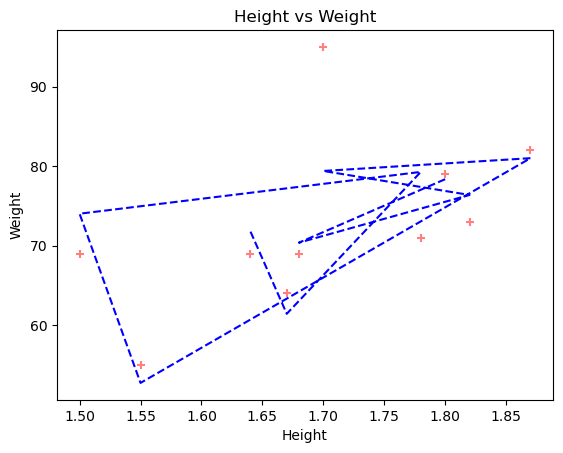

In [27]:
plt.scatter(dw['Height'],dw['Weight'], alpha=0.5, color='red', label='Predicted vs Actual',marker="+")

# Plot perfect prediction line
plt.plot(dw['Height'],y_pred, color='blue', linestyle='--')

# Labels and title
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")